## Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install scikit-learn
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn import metrics
import random
from math import *


     |████████████████████████████████| 1.7MB 5.8MB/s 
     |████████████████████████████████| 22.3MB 6.0MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Visualisation des signatures d'une personne

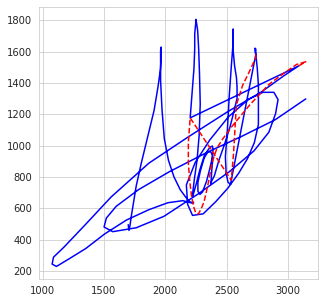

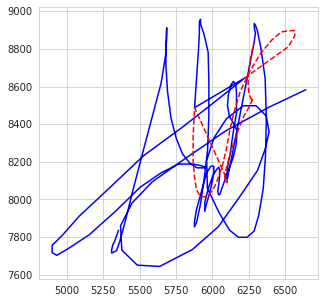

In [ ]:
! cd /content/


def plot(indice_individu,indice_signature):
  plt.figure(figsize=(5,5))
  vrais_points_X=[]
  vrais_points_Y=[]
  points_non_traces_X=[]
  points_non_traces_Y=[]
  df = pd.read_csv(str(indice_individu) + 'v' + str(indice_signature)+".txt", sep=" ",names=['X','Y','P0','Az','Al'])
  for i in range(len(df.loc[:,'P0'])):
    if df.loc[i,'P0'] == 0:
      points_non_traces_X.append(df.loc[i,'X'])
      points_non_traces_Y.append(df.loc[i,'Y'])
    else:
      vrais_points_X.append(df.loc[i,'X'])
      vrais_points_Y.append(df.loc[i,'Y'])
  plt.plot(vrais_points_X,vrais_points_Y,color='blue')
  plt.plot(points_non_traces_X,points_non_traces_Y,'--',color='red')

def plot_individu(individu):
  plt.figure(figsize=(15,8))
  for i in range(1,26):
    plt.subplot(5, 5, i)
    vrais_points_X=[]
    vrais_points_Y=[]
    points_non_traces_X=[]
    points_non_traces_Y=[]
    df = pd.read_csv(str(individu) + 'v' + str(i-1)+".txt", sep=" ",names=['X','Y','P0','Az','Al'])
    for i in range(len(df.loc[:,'P0'])):
      if df.loc[i,'P0'] == 0:
        points_non_traces_X.append(df.loc[i,'X'])
        points_non_traces_Y.append(df.loc[i,'Y'])
      else:
        vrais_points_X.append(df.loc[i,'X'])
        vrais_points_Y.append(df.loc[i,'Y'])
    plt.plot(vrais_points_X,vrais_points_Y,color='blue')
    plt.plot(points_non_traces_X,points_non_traces_Y,'--',color='red')

plot(23,4)
plot(23,5)


## Mesure de complexité moyenne sur les 25 signatures



0     31.05
1     29.46
2     30.94
3     31.94
4     30.25
      ...  
95    31.38
96    31.93
97    31.77
98    30.01
99    27.97
Length: 100, dtype: float64
0     28.14
1     27.03
2     29.79
3     29.70
4     28.82
      ...  
95    29.97
96    30.61
97    30.64
98    29.21
99    26.47
Length: 100, dtype: float64
[[29.08910984 28.39229965 27.85302983 ... 28.37255483 28.65876007
  28.89167779]
 [27.73804187 28.18704077 25.19662295 ... 27.16327585 26.05912451
  26.33876512]
 [29.34779341 29.76201696 29.46261844 ... 29.7360011  28.89745996
  30.35307126]
 ...
 [30.76775737 30.4965996  32.56072712 ... 30.49452098 30.58357175
  30.02657892]
 [28.75903984 29.13804166 29.30465239 ... 28.75559049 29.17698304
  28.95482807]
 [28.2331795  25.9690217  28.11620467 ... 26.755612   25.02013312
  25.94139173]]
0     19.34
1     22.57
2     26.63
3     25.29
4     23.18
      ...  
95    26.93
96    27.86
97    28.16
98    26.45
99    22.79
Length: 100, dtype: float64


ValueError: ignored

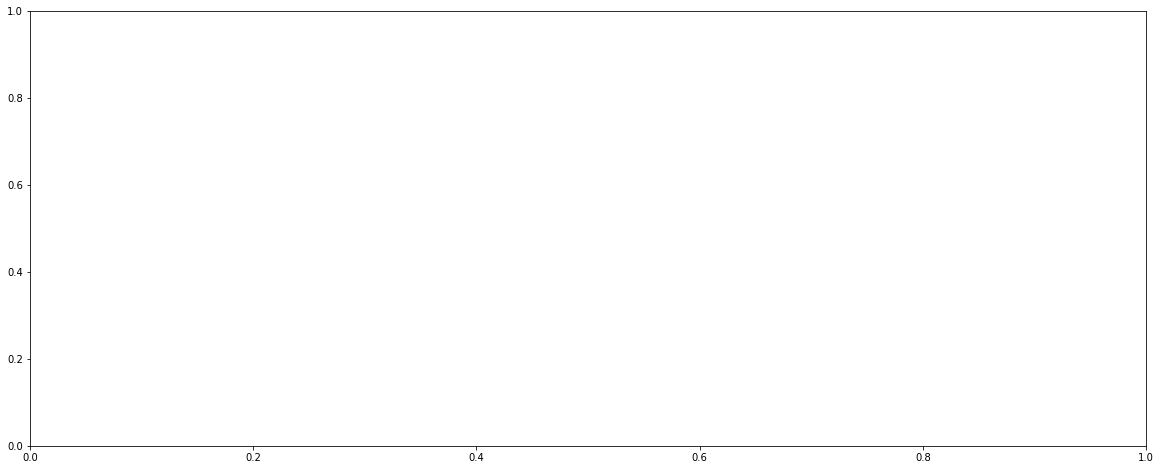

In [ ]:
! cd /content/sample_data/

GMM=[4,8]
df=pd.read_csv("/content/Complexité avec " + str(4) + "G (100x25).txt", sep="\t",decimal=",",names=[i+1 for i in range(25)])
mean4=df.mean(axis=1)
print(np.round(mean4, 2))

df=pd.read_csv("/content/Complexité avec " + str(8) + "G (100x25).txt", sep="\t",decimal=",",names=[i+1 for i in range(25)])
mean8=df.mean(axis=1)
print(np.round(mean8, 2))


df=pd.read_csv("/content/Complexité avec " + str(24) + "G (100x25).txt", sep="\t",names=[i+1 for i in range(25)])
mean24=df.mean(axis=1)
print(np.round(mean24, 2))

plt.figure(figsize=(20,8))
plt.scatter([i for i in range(1,101)],mean4, marker='x', label="4 Gaussiennes")
plt.scatter([i for i in range(1,101)],mean8, marker='x', label="8 Gaussiennes")
plt.scatter([i for i in range(1,101)],mean24, marker='x', label="24 Gaussiennes")
plt.xlabel("Indice de l'individu")
plt.ylabel("Complexité moyenne")
plt.title("Complexité moyenne pour chaque individu selon le nombre de gaussiennes")
plt.show()

##K-medoid

In [ ]:
df=pd.read_csv("/content/sample_data/Complexité avec 24G (100x25).txt", sep="\t")
a=df.iloc[[0],:]
mean=df.mean(axis=1)
#print (mean)
L=[0]*100
for i in range (0,98):
  L[i]=mean[i]
#print(L)
  
def init_medoids(X, k):
    from numpy.random import choice
    from numpy.random import seed
    seed(1)
    samples = choice(len(X), size=k, replace=False)
    I= np.array([X[samples[0]],X[samples[1]],X[samples[2]]])
    print(I)
    return I
medoids_initial = init_medoids(mean, 3)
#print(A)



def compute_d_p(X, medoids, p):
    #print(medoids)
    m = len(X)
    # If a 1-D array is provided, 
    # it will be reshaped to a single row 2-D array
    #if len(medoids_shape) == 1: 
     #   medoids = medoids.reshape((1,len(medoids)))
    if type(medoids) == list:
      k = len(medoids)
      S = np.empty((m, k))
    else:
      k=1 
      S = [0]*99
    
    
    if k==1:
      for i in range (m):
        a = abs(X[i] - medoids)
        S[i] = a 
    else:
      for i in range(m):
        for j in range (k):
         S[i][j] = abs(X[i] - medoids[j])

    return S

S = compute_d_p(mean, medoids_initial, 2)
#avg_dissimilarity = np.sum(compute_d_p(mean, medoids_initial, 2))
#print(avg_dissimilarity)
#print (S)

def assign_labels(S):
    return np.argmin(S, axis=1)
  
labels = assign_labels(S)
print (labels)




def update_medoids(X, medoids, p):
    #print (medoids)
    S = compute_d_p(mean, medoids, p)
    labels = assign_labels(S)
        
    out_medoids = medoids
                
    for i in set(labels):
        
        avg_dissimilarity = np.sum(compute_d_p(mean, medoids[i], p))


        cluster_points = mean[labels == i]
        #print (cluster_points)
        
        for m in cluster_points:
            new_medoid = m
            new_dissimilarity= np.sum(compute_d_p(mean, m, p))
            
            if new_dissimilarity < avg_dissimilarity :
                avg_dissimilarity = new_dissimilarity
                
                out_medoids[i] = m
                #print(out_medoids)
    #print(out_medoids)            
    return out_medoids


def has_converged(old_medoids, medoids):
    #print(old_medoids)
    #print(medoids)
    return (old_medoids == medoids).all()





def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids
   # print (medoids)    
    converged = False
    labels = np.zeros(len(X))
    #print(labels)
    i = 1
    while (np.any(not converged)) and (i <= max_steps):
        old_medoids = medoids.copy()
       # print (medoids)
        S = compute_d_p(X, medoids, p)
        
        labels = assign_labels(S)
        
        medoids = update_medoids(X, medoids, p)
        
        converged = has_converged(old_medoids, medoids)
        #print(converged)
        i += 1
    return (medoids,labels)

results = kmedoids(mean, 3, 2)
final_medoids = results[0]
mean['clusters'] = results[1]
print(final_medoids)
print (results[1])


[26.19136698 25.99887644 27.52659611]
[1 0 1 1 0 1 1 1 1 2 0 0 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 0 2 1 1 1 0
 1 0 1 2 1 0 2 2 2 1 1 1 1 1 2 2 1 2 0 1 1 1 2 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 2 1 2 1 1 1 2 1 0 1 1 1 2 1 0 1 0 2 0 2 2 2 2 0 1]
[26.19136698 25.99887644 27.52659611]
[25.29395497 24.82341412 25.57102157]
[1 2 0 1 2 1 1 2 1 2 2 2 2 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 2 1 1 2 2 1 1 1 2
 2 2 1 2 1 2 2 2 2 1 1 1 1 1 2 2 1 2 2 1 1 1 2 1 1 1 2 1 0 1 1 1 2 2 1 1 1
 2 1 2 1 1 1 2 1 2 2 1 1 2 1 2 1 2 2 2 2 2 2 2 2 1]


K medoide bis


In [ ]:



df1=pd.read_csv("/content/sample_data/Complexité avec 24G (100x25).txt", sep="\t")
a=df.iloc[[0],:]
mean1=df1.mean(axis=1)
print(mean1)
X1=np.array(mean1)
X1=X1.reshape(-1,1)
kmedoids24 = KMedoids(n_clusters=3).fit(X1)
kmedoids24.labels_
kmedoids24.cluster_centers_
#kmedoids24.inertia_





0     22.572258
1     26.631319
2     25.293955
3     23.179699
4     26.713651
        ...    
94    26.931781
95    27.858715
96    28.156904
97    26.446162
98    22.785892
Length: 99, dtype: float64


array([[23.79188039],
       [11.08732211],
       [26.89118134]])

## K-Moyenne
### Normalisation

In [ ]:
X1=np.array(mean4)
X1=X1/40.0 # on normalise par 40 car on constate que la complexité moyenne n'atteient jamais la valeur 40 sur le graphique 
X1=X1.reshape(-1,1)

X2=np.array(mean8)
X2=X2/40.0
X2=X2.reshape(-1,1)

X3=np.array(mean24)
X3=X3/40.0
X3=X3.reshape(-1,1)

### Répartition des moyennes dans les clusters

[31.04646349151155, 30.935473287697274, 31.943561456913084, 30.69617471670326, 30.606420078815123, 30.800599129785546, 32.06345986836486, 31.998059136715742, 31.105139149734505, 30.710148349304465, 31.577926232926202, 31.29669527989694, 31.538002063953055, 30.74961785835811, 32.36275580474817, 31.458072881363393, 32.55400176844401, 31.5906760294372, 31.77120512573707, 31.26907357543135, 32.14993289930205, 31.95483436657147, 32.111375111241884, 30.79288976532355, 31.853543482166927, 30.91766267677355, 30.88091648654532, 31.359963936946464, 30.67392126278407, 30.741485378786003, 31.56186329486009, 30.82571314389915, 30.93098229860708, 31.824308838629694, 31.449428910645455, 31.50481358688017, 30.54186362456419, 30.86449253047868, 30.58841245529803, 32.096750228976695, 31.378984706061388, 31.93365355683535, 31.773331198310736]
[28.69650830656922, 28.51115348291158, 27.359313988007376, 27.51096940203796, 27.9989200565918, 28.197705509544747, 28.463889590774983, 26.228741702200317, 28.00710

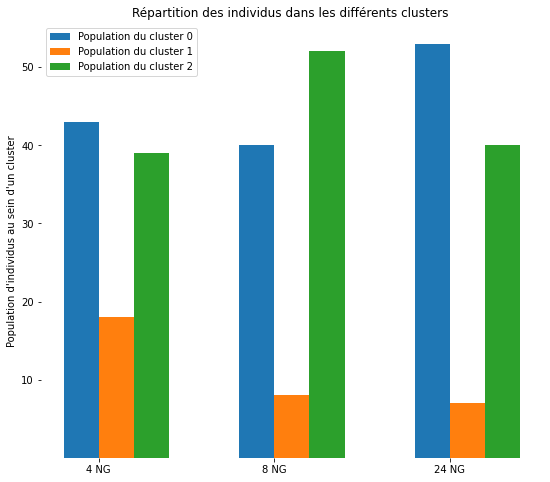

In [ ]:
abs=[X1,X2,X3]
MoyenneNG=[mean4,mean8,mean24]

def pourcentage(X,mean):
  k=3
  ordonne=[0,0,0]

  kmeans=MiniBatchKMeans(n_clusters = k,batch_size=100)
  kmeans.fit(X)
  kmeans.labels_
  cluster0=[]
  cluster1=[]
  cluster2=[]
  indices_cluster0=[]
  indices_cluster1=[]
  indices_cluster2=[]

  for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
      ordonne[0]+=1
      cluster0.append(mean[i])
      indices_cluster0.append(i)
    elif kmeans.labels_[i] == 1:
      ordonne[1]+=1
      cluster1.append(mean[i])
      indices_cluster1.append(i)
    else:
      ordonne[2]+=1
      cluster2.append(mean[i])
      indices_cluster2.append(i)
  return [ordonne,cluster0,cluster1,cluster2,indices_cluster0,indices_cluster1,indices_cluster2]

[Population4NG,Cluster0_4NG,Cluster1_4NG,Cluster2_4NG,indices_cluster0_4NG,indices_cluster1_4NG,indices_cluster2_4NG]=pourcentage (X1,mean4)
[Population8NG,Cluster0_8NG,Cluster1_8NG,Cluster2_8NG,indices_cluster0_8NG,indices_cluster1_8NG,indices_cluster2_8NG]=pourcentage (X2,mean8)
[Population24NG,Cluster0_24NG,Cluster1_24NG,Cluster2_24NG,indices_cluster0_24NG,indices_cluster1_24NG,indices_cluster2_24NG]=pourcentage (X3,mean24)

print(Cluster0_4NG)
print(Cluster1_4NG)
print(Cluster2_4NG)

data=[Population4NG,Population8NG,Population24NG]

dim = len(data[0]) 
w = 0.6
dimw = w / dim 
  
fig, ax = plt.subplots() 

fig.set_figheight(8)
fig.set_figwidth(9)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

x = np.arange(len(data)) 
for i in range(len(data[0])): 
    y = [d[i] for d in data] 
    b = ax.bar(x + i * dimw, y,  dimw,  label='Population du cluster '+ str(i), bottom = 0.001) 
  
ax.set_xticks(x + dimw / 2) 
ax.set_xticklabels(["4 NG","8 NG","24 NG"] )
ax.set_ylabel("Population d'individus au sein d'un cluster")

  
ax.set_title('Répartition des individus dans les différents clusters ') 

plt.legend()
plt.show() 

### Représentation des clusters et évaluation du modèle 



[[29.8028462 ]
 [27.81165239]
 [31.42619882]]
Inertie pour 4 gaussiennes : 0.018812137256264762
Homogénéité pour 4 gaussiennes : 0.22573112529155107


[[30.01045848]
 [22.68700889]
 [27.88091455]]
Inertie pour 8 gaussiennes : 0.03178012843964005
Homogénéité pour 8 gaussiennes : 0.19730353290968217


[[23.14211389]
 [11.65548049]
 [26.9141548 ]]
Inertie pour 24 gaussiennes : 0.11466332746387607
Homogénéité pour 24 gaussiennes : 0.19504427069784552


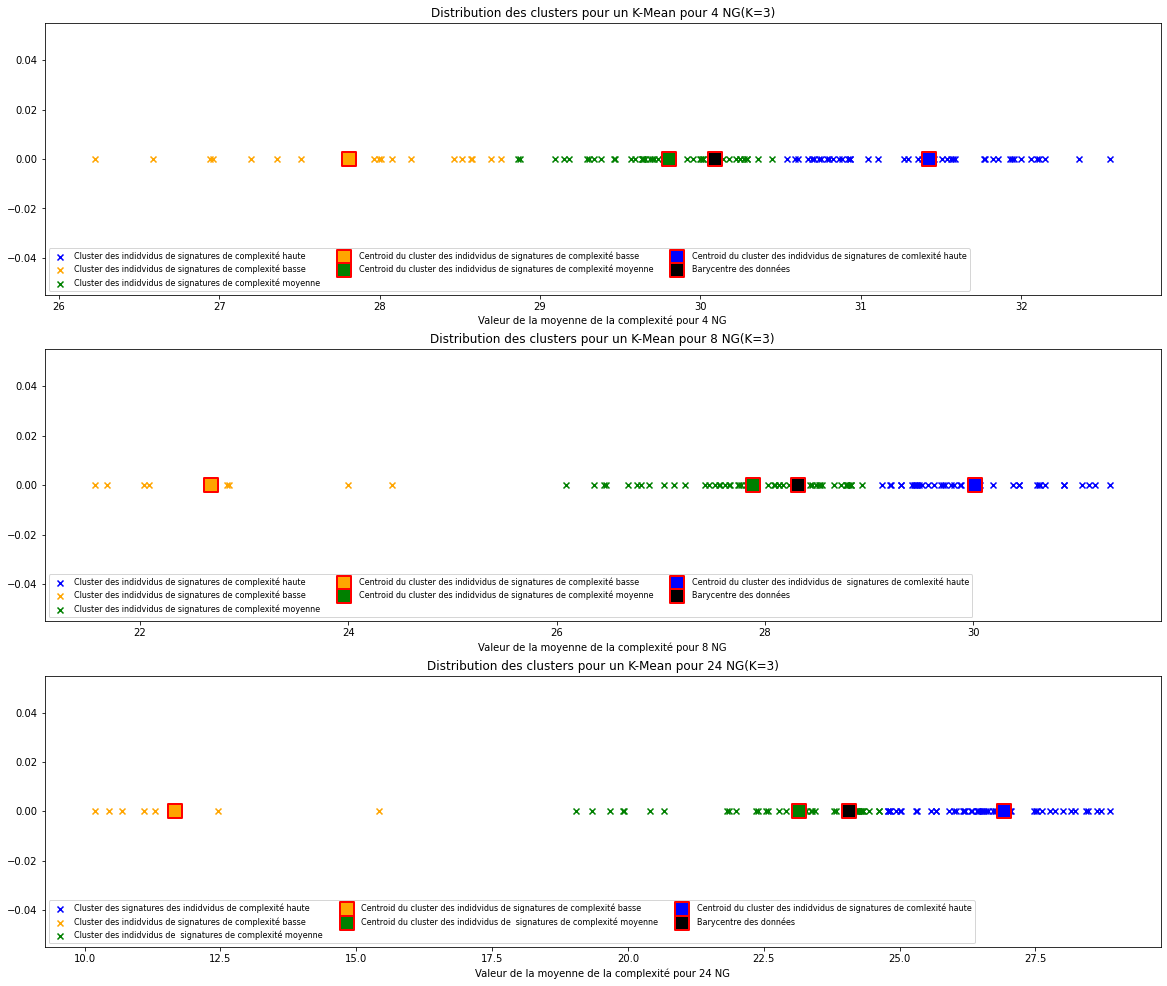

In [ ]:
k=3
L=[X1,X2,X3]
representants=[]

def barycentre(X):
  somme=0
  for i in range (len(X)):
    somme+=X[i]
  return somme/len(X)


for i in range (len(L)):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(L[i])
  print(kmeans.cluster_centers_*40)
  representants.append(kmeans.cluster_centers_[0][0]*40)
  representants.append(kmeans.cluster_centers_[1][0]*40)
  representants.append(kmeans.cluster_centers_[2][0]*40)
  kmeans.labels_
  if i == 0:
    print('Inertie pour 4 gaussiennes : {}'.format(kmeans.inertia_))
    print('Homogénéité pour 4 gaussiennes : {}'.format(metrics.homogeneity_score(mean4, kmeans.labels_)))
    print('\n')
  elif i == 1 :
    print('Inertie pour 8 gaussiennes : {}'.format(kmeans.inertia_))
    print('Homogénéité pour 8 gaussiennes : {}'.format(metrics.homogeneity_score(mean8, kmeans.labels_)))
    print('\n')
  else:
    print('Inertie pour 24 gaussiennes : {}'.format(kmeans.inertia_))
    print('Homogénéité pour 24 gaussiennes : {}'.format(metrics.homogeneity_score(mean24, kmeans.labels_)))

representants4NG=np.sort(representants[:3])
representants8NG=np.sort(representants[3:6])
representants24NG=np.sort(representants[6:])

X1=np.sort(mean4)
X2=np.sort(mean8)
X3=np.sort(mean24)

barycentre4NG=barycentre(X1)
barycentre8NG=barycentre(X2)
barycentre24NG=barycentre(X3)

figure1 = plt.figure(figsize = (20, 17))

plt.subplot(3,1,1)
plt.xlabel('Valeur de la moyenne de la complexité pour 4 NG')
plt.title('Distribution des clusters pour un K-Mean pour 4 NG(K=3)')
i = plt.scatter(Cluster0_4NG,[0 for i in range(len(Cluster0_4NG))],color='blue',marker="x")
ii = plt.scatter(Cluster1_4NG,[0 for i in range(len(Cluster1_4NG))],color='orange',marker='x')
iii = plt.scatter(Cluster2_4NG,[0 for i in range(len(Cluster2_4NG))],color='green',marker='x')
te = plt.scatter(representants4NG[0],[0],color='orange',linewidths=2,marker='s',s=200,edgecolor ="red")
ar = plt.scatter(representants4NG[1],[0],color='green',linewidths=2,marker='s',s=200,edgecolor ="red")
hj = plt.scatter(representants4NG[2],[0],color='blue',linewidths=2,marker='s',s=200,edgecolor ="red")
hh = plt.scatter([barycentre4NG],[0],color='black',linewidths=2,marker='s',s=200,edgecolor ="red")
plt.legend((i, ii, iii, te, ar, hj, hh),
           ("Cluster des indidvidus de signatures de complexité haute", "Cluster des indidvidus de signatures de complexité basse", "Cluster des indidvidus de signatures de complexité moyenne", "Centroid du cluster des indidvidus de signatures de complexité basse", "Centroid du cluster des indidvidus de signatures de complexité moyenne", "Centroid du cluster des indidvidus de signatures de comlexité haute", "Barycentre des données"),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.subplot(3,1,2)
plt.xlabel('Valeur de la moyenne de la complexité pour 8 NG')
plt.title('Distribution des clusters pour un K-Mean pour 8 NG(K=3)')
l = plt.scatter(Cluster0_8NG,[0 for i in range(len(Cluster0_8NG))],color='blue',marker='x')
lll = plt.scatter(Cluster1_8NG,[0 for i in range(len(Cluster1_8NG))],color='orange',marker='x')
llll = plt.scatter(Cluster2_8NG,[0 for i in range(len(Cluster2_8NG))],color='green',marker='x')
po = plt.scatter(representants8NG[0],[0],color='orange',linewidths=2,marker='s',s=200,edgecolor ="red")
hu = plt.scatter(representants8NG[1],[0],color='green',linewidths=2,marker='s',s=200,edgecolor ="red")
hah = plt.scatter(representants8NG[2],[0],color='blue',linewidths=2,marker='s',s=200,edgecolor ="red")
hoh = plt.scatter([barycentre8NG],[0],color='black',linewidths=2,marker='s',s=200,edgecolor ="red")
plt.legend((l, lll, llll, po, hu, hah, hoh),
           ("Cluster des indidvidus de signatures de complexité haute", "Cluster des indidvidus de signatures de complexité basse", "Cluster des indidvidus de signatures de complexité moyenne", "Centroid du cluster des indidvidus de signatures de complexité basse", "Centroid du cluster des indidvidus de signatures de complexité moyenne", "Centroid du cluster des indidvidus de  signatures de comlexité haute", "Barycentre des données"),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.subplot(3,1,3)
plt.xlabel('Valeur de la moyenne de la complexité pour 24 NG')
plt.title('Distribution des clusters pour un K-Mean pour 24 NG(K=3)')
lo = plt.scatter(Cluster0_24NG,[0 for i in range(len(Cluster0_24NG))],color='blue',marker='x',label="Cluster des individus signatures de complexité haute")
ll = plt.scatter(Cluster1_24NG,[0 for i in range(len(Cluster1_24NG))],color='orange',marker='x',label="Cluster des individus signatures de complexité basse")
l = plt.scatter(Cluster2_24NG,[0 for i in range(len(Cluster2_24NG))],color='green',marker='x',label="Cluster des individus de signatures de complexité moyenne")
a = plt.scatter(representants24NG[0],[0],color='orange',linewidths=2,marker='s',s=200,label="Centroid du cluster des signatures de complexité basse",edgecolor ="red")
h = plt.scatter(representants24NG[1],[0],color='green',linewidths=2,marker='s',s=200,label="Centroid du cluster des signatures de complexité moyenne", edgecolor ="red")
hh = plt.scatter(representants24NG[2],[0],color='blue',linewidths=2,marker='s',s=200,label="Centroid du cluster des signatures de comlexité haute",edgecolor ="red")
ho = plt.scatter([barycentre24NG],[0],color='black',linewidths=2,marker='s',s=200,label="Barycentre des données",edgecolor ="red")
plt.legend((lo, ll, l, a, h, hh, ho),
           ("Cluster des signatures des indidvidus de complexité haute", "Cluster des indidvidus de signatures de complexité basse", "Cluster des indidvidus de  signatures de complexité moyenne", "Centroid du cluster des indidvidus de signatures de complexité basse", "Centroid du cluster des indidvidus de  signatures de complexité moyenne", "Centroid du cluster des indidvidus de signatures de comlexité haute", "Barycentre des données"),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


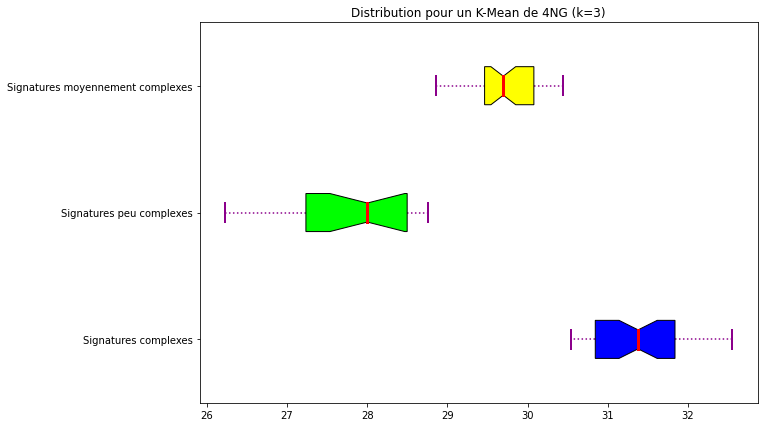

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


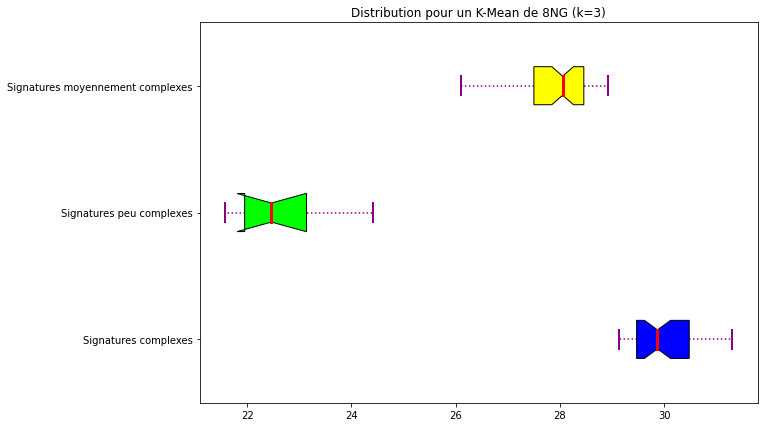

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


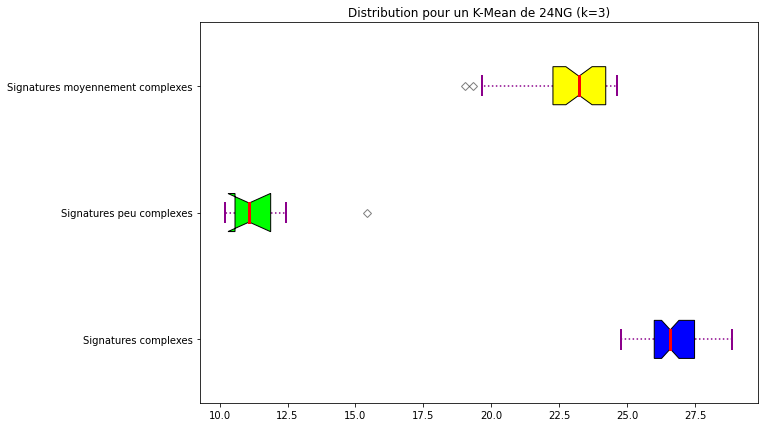

In [ ]:
data1=[Cluster0_4NG,Cluster1_4NG,Cluster2_4NG]
data2=[Cluster0_8NG,Cluster1_8NG,Cluster2_8NG]
data3=[Cluster0_24NG,Cluster1_24NG,Cluster2_24NG]


fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_subplot(111) 
  
bp = ax.boxplot(data1, patch_artist = True, 
                notch ='True', vert = 0) 
  
colors = ['#0000FF', '#00FF00',  
          '#FFFF00', '#FF00FF'] 
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
for whisker in bp['whiskers']: 
    whisker.set(color ='#8B008B', 
                linewidth = 1.5, 
                linestyle =":") 
for cap in bp['caps']: 
    cap.set(color ='#8B008B', 
            linewidth = 2) 
for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 3) 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='#e7298a', 
              alpha = 0.5) 
ax.set_yticklabels(['Signatures complexes', 'Signatures peu complexes',  
                    'Signatures moyennement complexes']) 
plt.title("Distribution pour un K-Mean de 4NG (k=3)") 
ax.get_xaxis().tick_bottom() 
ax.get_yaxis().tick_left() 
plt.show(bp) 

##

fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_subplot(111) 
  
bp = ax.boxplot(data2, patch_artist = True, 
                notch ='True', vert = 0) 
  
colors = ['#0000FF', '#00FF00',  
          '#FFFF00', '#FF00FF'] 
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
for whisker in bp['whiskers']: 
    whisker.set(color ='#8B008B', 
                linewidth = 1.5, 
                linestyle =":") 
for cap in bp['caps']: 
    cap.set(color ='#8B008B', 
            linewidth = 2) 
for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 3) 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='#e7298a', 
              alpha = 0.5) 
ax.set_yticklabels(['Signatures complexes', 'Signatures peu complexes',  
                    'Signatures moyennement complexes']) 
plt.title("Distribution pour un K-Mean de 8NG (k=3)") 
ax.get_xaxis().tick_bottom() 
ax.get_yaxis().tick_left() 
plt.show(bp) 

##

fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_subplot(111) 
  
bp = ax.boxplot(data3, patch_artist = True, 
                notch ='True', vert = 0) 
  
colors = ['#0000FF', '#00FF00',  
          '#FFFF00', '#FF00FF'] 
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
for whisker in bp['whiskers']: 
    whisker.set(color ='#8B008B', 
                linewidth = 1.5, 
                linestyle =":") 
for cap in bp['caps']: 
    cap.set(color ='#8B008B', 
            linewidth = 2) 
for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 3) 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='#e7298a', 
              alpha = 0.5) 
ax.set_yticklabels(['Signatures complexes', 'Signatures peu complexes',  
                    'Signatures moyennement complexes']) 
plt.title("Distribution pour un K-Mean de 24NG (k=3)") 
ax.get_xaxis().tick_bottom() 
ax.get_yaxis().tick_left() 
plt.show(bp) 

### Visualisation des clusters

[28, 62]


FileNotFoundError: ignored

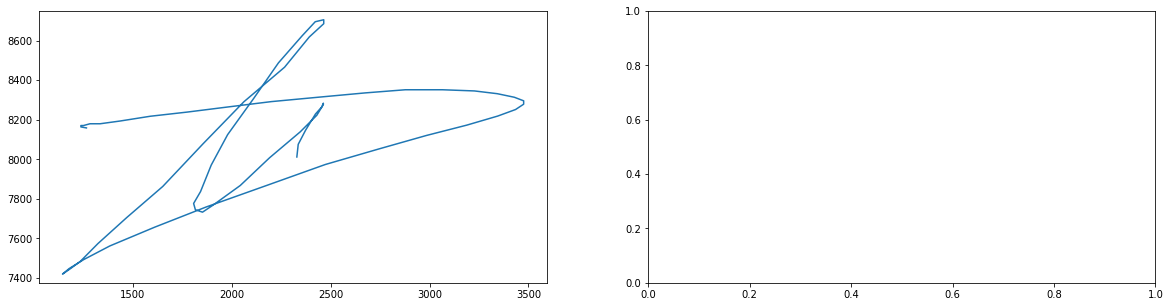

In [ ]:
def plot_signature_clusters(indices_cluster):
  liste_indice_cluster=random.sample(indices_cluster,2)
  liste_indice_cluster.sort()
  print(liste_indice_cluster)
  plt.figure(figsize=(20,5))
  for i in range (3):
    plt.subplot(1,2,i+1)
    df = pd.read_csv(str(liste_indice_cluster[i]) + "v0.txt", sep=" ",names=['X','Y','P0','Az','Al'])
    plt.plot(df["X"],df['Y'])
    plt.axis('equal')
  return None

#plot_signature_clusters(indices_cluster0_4NG)
plot_signature_clusters(indices_cluster1_4NG)
#plot_signature_clusters(indices_cluster2_4NG)


### Calcul de l'inertie intra-classe

In [ ]:
def distance2(x,y):
  return (x-y)**2

def wss_cluster(cluster,representant):
  somme_distance=0
  for j in cluster:
    somme_distance+=distance2(j,representant)
  return somme_distance
'''
print("Inertie intra-classe pour le cluster des signatures les plus complexes avec 4NG : " + str(np.round(wss_cluster(Cluster0_4NG,representants4NG[2]),2)))
print("Inertie intra-classe pour le cluster des signatures moyennement complexes avec 4NG : " + str(np.round(wss_cluster(Cluster1_4NG,representants4NG[0]),2)))
print("Inertie intra-classe pour le cluster des signatures les moins complexes avec 4NG : " + str(np.round(wss_cluster(Cluster2_4NG,representants4NG[1]),2)))
print("Inertie intra-classe pour 4NG : " + str(np.round(wss_cluster(Cluster2_4NG,representants4NG[1]),2) + np.round(wss_cluster(Cluster1_4NG,representants4NG[0]),2) + np.round(wss_cluster(Cluster0_4NG,representants4NG[2]),2)))
print("\n")
print("Inertie intra-classe pour le cluster des signatures les plus complexes avec 8NG : " + str(np.round(wss_cluster(Cluster0_8NG,representants8NG[2]),2)))
print("Inertie intra-classe pour le cluster des signatures les moins complexes avec 8NG : " + str(np.round(wss_cluster(Cluster1_8NG,representants8NG[0]),2)))
print("Inertie intra-classe pour le cluster des signatures moyennement complexes avec 8NG : " + str(np.round(wss_cluster(Cluster2_8NG,representants8NG[1]),2)))
print("Inertie intra-classe pour 8NG : " + str(np.round(wss_cluster(Cluster2_8NG,representants8NG[1]),2) + np.round(wss_cluster(Cluster1_8NG,representants8NG[0]),2) + np.round(wss_cluster(Cluster0_8NG,representants8NG[2]),2)))

print("\n")
print("Inertie intra-classe pour le cluster des signatures les moins complexes avec 24NG : " + str(np.round(wss_cluster(Cluster1_24NG,representants24NG[0]),2)))
print("Inertie intra-classe pour le cluster des signatures moyennement complexes avec 24NG : " + str(np.round(wss_cluster(Cluster2_24NG,representants24NG[1]),2)))
print("Inertie intra-classe pour le cluster des signatures les plus complexes avec 24NG : " + str(np.round(wss_cluster(Cluster0_24NG,representants24NG[2]),2)))
print("Inertie intra-classe pour 24NG : " + str(np.round(wss_cluster(Cluster2_24NG,representants24NG[1]),2) + np.round(wss_cluster(Cluster1_24NG,representants24NG[0]),2) + np.round(wss_cluster(Cluster0_24NG,representants24NG[2]),2)))

'''



'\nprint("Inertie intra-classe pour le cluster des signatures les plus complexes avec 4NG : " + str(np.round(wss_cluster(Cluster0_4NG,representants4NG[2]),2)))\nprint("Inertie intra-classe pour le cluster des signatures moyennement complexes avec 4NG : " + str(np.round(wss_cluster(Cluster1_4NG,representants4NG[0]),2)))\nprint("Inertie intra-classe pour le cluster des signatures les moins complexes avec 4NG : " + str(np.round(wss_cluster(Cluster2_4NG,representants4NG[1]),2)))\nprint("Inertie intra-classe pour 4NG : " + str(np.round(wss_cluster(Cluster2_4NG,representants4NG[1]),2) + np.round(wss_cluster(Cluster1_4NG,representants4NG[0]),2) + np.round(wss_cluster(Cluster0_4NG,representants4NG[2]),2)))\nprint("\n")\nprint("Inertie intra-classe pour le cluster des signatures les plus complexes avec 8NG : " + str(np.round(wss_cluster(Cluster0_8NG,representants8NG[2]),2)))\nprint("Inertie intra-classe pour le cluster des signatures les moins complexes avec 8NG : " + str(np.round(wss_cluster(C

### Calcul de l'inertie inter-classe

In [ ]:
def normalisation(X,barycentre): # a mettre depuis le debut + parler d'extraire les siignatures aux frontières
  normalisation=[]
  for i in X:
    normalisation.append((i-barycentre)/np.std(X))
  return normalisation

#print(normalisation(X1,barycentre4NG))
#print(normalisation(X2,barycentre8NG))
#print(normalisation(X3,barycentre24NG))

def bss(representants,barycentre,k):
  somme=0
  for i in range(k):
    somme+=(representants[i]-barycentre)**2
  return somme
"""
print("Inertie inter-classe pour 4NG : " + str(np.round(bss(representants4NG,barycentre4NG,3),2)))
print("Inertie inter-classe pour 8NG : " + str(np.round(bss(representants8NG,barycentre8NG,3),2)))
print("Inertie inter-classe pour 24NG : " + str(np.round(bss(representants24NG,barycentre24NG,3),2)))

"""

'\nprint("Inertie inter-classe pour 4NG : " + str(np.round(bss(representants4NG,barycentre4NG,3),2)))\nprint("Inertie inter-classe pour 8NG : " + str(np.round(bss(representants8NG,barycentre8NG,3),2)))\nprint("Inertie inter-classe pour 24NG : " + str(np.round(bss(representants24NG,barycentre24NG,3),2)))\n\n'

## 2ème partie

[19.4183791733071, 21.1680409746232, 17.9781141386921, 20.3498100329553, 18.9587497290952, 17.8805970286835, 20.276367347782, 23.2072891377551, 19.794415507648, 19.3198059132879, 19.0407418203246, 19.1072566262008, 19.3729599852317, 20.7617709167892, 20.4431873162614, 18.5740538645699, 17.278134531521, 19.5412063956489, 17.4147971089666, 20.118962744818, 17.52206238383, 20.5352255362678, 17.9159629374058, 19.7540138374252, 17.6896805730338, 23.8915323112409, 21.4100940463013, 22.2171687371491, 19.4884789619339, 21.5917561662867, 25.0322449046523, 23.5988775652904, 24.5553374261018, 22.0850593660793, 25.0364971903778, 22.7621881831891, 22.8077870611582, 24.6566595508761, 23.0067436553903, 21.2154806958798, 22.9052540278897, 23.247706235594, 22.1646619928532, 21.5230573206646, 21.1236664215915, 21.4416184142763, 23.1950704747524, 20.8447141302536, 23.1262960011889, 21.3784929143305, 26.7815317826965, 27.1259419433164, 26.7839029164343, 26.2525233843375, 26.5719127916834, 27.5787326974565

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


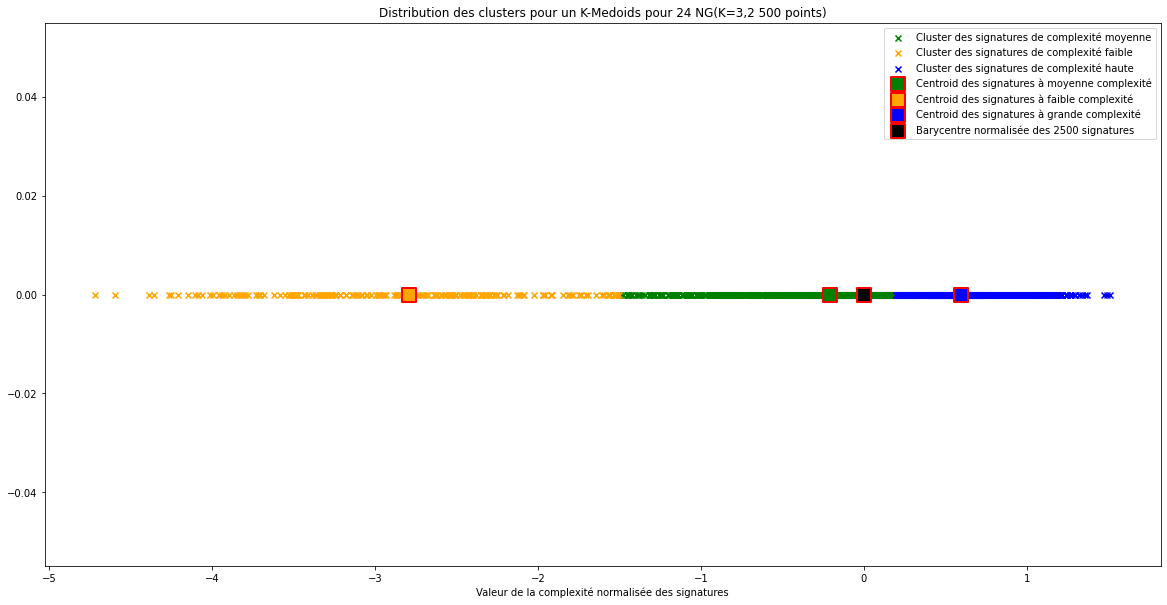

In [ ]:
! cd /content/


df=pd.read_csv("/content/Complexité avec " + str(24) + "G (100x25).txt", sep="\t",decimal=",",names=[i+1 for i in range(25)])

nmp=df.to_numpy()

liste=[]
for i in range(len(nmp)):
  for j in range(len(nmp[0])):
    liste.append(float(nmp[i][j]))
print(liste)
k=3
representants=[]

def barycentre2(X):
  somme=0
  for i in range (np.size(X)):
    somme+=X[i]
  return somme/np.size(X)

barycentre1=barycentre2(liste)

liste_normalisee=normalisation(liste,barycentre1)
liste_normalisee=np.array(liste_normalisee)
liste_normalisee=liste_normalisee.reshape(-1,1)

barycentre2=barycentre2(liste_normalisee)

kmedoids = KMedoids(n_clusters=k)
kmedoids.fit(liste_normalisee)
print(kmedoids.cluster_centers_)
representants.append(kmedoids.cluster_centers_[0])
representants.append(kmedoids.cluster_centers_[1])
representants.append(kmedoids.cluster_centers_[2])
kmedoids.labels_

ordonne=[0,0,0]
cluster0=[]
cluster1=[]
cluster2=[]
indices_cluster0=[]
indices_cluster1=[]
indices_cluster2=[]
for i in range(len(kmedoids.labels_)):
  if kmedoids.labels_[i] == 0:
      ordonne[0]+=1
      cluster0.append(liste_normalisee[i])
      indices_cluster0.append(i)
  elif kmedoids.labels_[i] == 1:
      ordonne[1]+=1
      cluster1.append(liste_normalisee[i])
      indices_cluster1.append(i)
  else:
      ordonne[2]+=1
      cluster2.append(liste_normalisee[i])
      indices_cluster2.append(i)
 
print(ordonne)
print(cluster0)
print(cluster1)
print(cluster2)

print('Inertie de sk-learn : {}'.format(kmedoids.inertia_))
print('Homogénéité de sk-learn: {}'.format(metrics.homogeneity_score(liste, kmedoids.labels_)))
print('Indice de silhouette : {}'.format(metrics.silhouette_score(liste_normalisee,kmedoids.labels_)))
print("Inertie inter-classe pour le K-Medoids sur l'ensemble des données : " + str(np.round(bss(representants,barycentre2,3),2)))
print("Inertie intra-classe pour le cluster des signatures les moins complexes pour le K-Medoids sur l'ensemble des données : " + str(np.round(wss_cluster(cluster1,representants[0]),2)))
print("Inertie intra-classe pour le cluster des signatures moyennement complexes pour le K-Medoids sur l'ensemble des données: " + str(np.round(wss_cluster(cluster2,representants[1]),2)))
print("Inertie intra-classe pour le cluster des signatures les plus complexes pour le K-Medoids sur l'ensemble des données  : " + str(np.round(wss_cluster(cluster0,representants[2]),2)))
print("Inertie intra-classe pour le K-Medoids sur l'ensemble des données : " + str(np.round(wss_cluster(cluster1,representants[0]),2) + np.round(wss_cluster(cluster2,representants[1]),2) + np.round(wss_cluster(cluster0,representants[2]),2)))

representants=np.sort(representants)

figure1 = plt.figure(figsize = (20, 10))

plt.xlabel('Valeur de la complexité normalisée des signatures')
plt.title('Distribution des clusters pour un K-Medoids pour 24 NG(K=3,2 500 points)')
plt.scatter(cluster0,[0 for i in range(len(cluster0))],color='green',marker='x',label = "Cluster des signatures de complexité moyenne")
plt.scatter(cluster1,[0 for i in range(len(cluster1))],color='orange',marker='x',label = "Cluster des signatures de complexité faible")
plt.scatter(cluster2,[0 for i in range(len(cluster2))],color='blue',marker='x',label = "Cluster des signatures de complexité haute")
plt.scatter(representants[0],[0],color='green',linewidths=2,marker='s',s=200,label="Centroid des signatures à moyenne complexité",edgecolor ="red")
plt.scatter(representants[1],[0],color='orange',linewidths=2,marker='s',s=200,label="Centroid des signatures à faible complexité",edgecolor ="red")
plt.scatter(representants[2],[0],color='blue',linewidths=2,marker='s',s=200,label="Centroid des signatures à grande complexité",edgecolor ="red")
plt.scatter([barycentre2],[0],color='black',linewidths=2,marker='s',s=200,label="Barycentre normalisée des 2500 signatures",edgecolor ="red")
plt.legend()
plt.show()

### Répartition individus

In [ ]:
import seaborn as sns

compte=[0,0,0]

print([i for i in range(0,25)])

liste_individu=[[0,0,0]for i in range(100)]
print(len(liste_individu))

for k in range(100):
  for i in range(k*25,(k+1)*25):
    if kmedoids.labels_[i] ==0:
      liste_individu[k][0]+=1
    elif kmedoids.labels_[i] == 1:
      liste_individu[k][1]+=1
    else:
      liste_individu[k][2]+=1
  
print(liste_individu)

def classification_individu(liste_individu):
  liste_meilleur_indice=[]
  for i in range(len(liste_individu)):
    max=0
    max_indice=0
    for j in range(len(liste_individu[0])):
      if liste_individu[i][j] > max:
        max_indice=j
        max=liste_individu[i][j]
    liste_meilleur_indice.append(max_indice)
  return liste_meilleur_indice

print(classification_individu(liste_individu))
compte=[]
cl1=classification_individu(liste_individu).count(1)
compte.append(cl1)
cl0=classification_individu(liste_individu).count(0)
compte.append(cl0)
cl2=classification_individu(liste_individu).count(2)
compte.append(cl1)

plt.figure(figsize = (10, 7))
bars = ('Cluster Faiblement Complexe', 'Cluster Moyennement Complexe', 'Cluster Hautement Complexe')
plt.bar([0,1,2], compte, color=['orange', 'green', 'blue'])
plt.xticks([0,1,2], bars)
plt.title("Répartition des individus dans chaque cluster")
plt.ylabel("Nombre d'individu dans le cluster")
plt.show()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
100


NameError: ignored

### Individus mal classés

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
100
[[22, 3, 0], [23, 0, 2], [0, 0, 25], [5, 0, 20], [23, 0, 2], [0, 0, 25], [12, 0, 13], [21, 4, 0], [3, 0, 22], [18, 0, 7], [0, 0, 25], [0, 0, 25], [0, 0, 25], [0, 0, 25], [24, 0, 1], [1, 24, 0], [0, 25, 0], [24, 0, 1], [25, 0, 0], [5, 0, 20], [18, 7, 0], [0, 25, 0], [4, 21, 0], [22, 0, 3], [0, 0, 25], [0, 0, 25], [24, 1, 0], [22, 0, 3], [0, 25, 0], [4, 0, 21], [25, 0, 0], [25, 0, 0], [1, 0, 24], [0, 0, 25], [24, 0, 1], [17, 0, 8], [0, 25, 0], [1, 0, 24], [4, 0, 21], [1, 0, 24], [13, 0, 12], [0, 0, 25], [20, 0, 5], [0, 0, 25], [0, 0, 25], [0, 0, 25], [0, 0, 25], [23, 2, 0], [24, 1, 0], [25, 0, 0], [21, 0, 4], [14, 0, 11], [0, 0, 25], [0, 0, 25], [25, 0, 0], [0, 0, 25], [1, 0, 24], [18, 0, 7], [17, 0, 8], [24, 0, 1], [0, 0, 25], [10, 0, 15], [15, 0, 10], [17, 0, 8], [0, 0, 25], [18, 0, 7], [5, 0, 20], [16, 0, 9], [25, 0, 0], [25, 0, 0], [0, 0, 25], [3, 0, 22], [20, 0, 5], [20, 0, 5], [13, 0, 12]

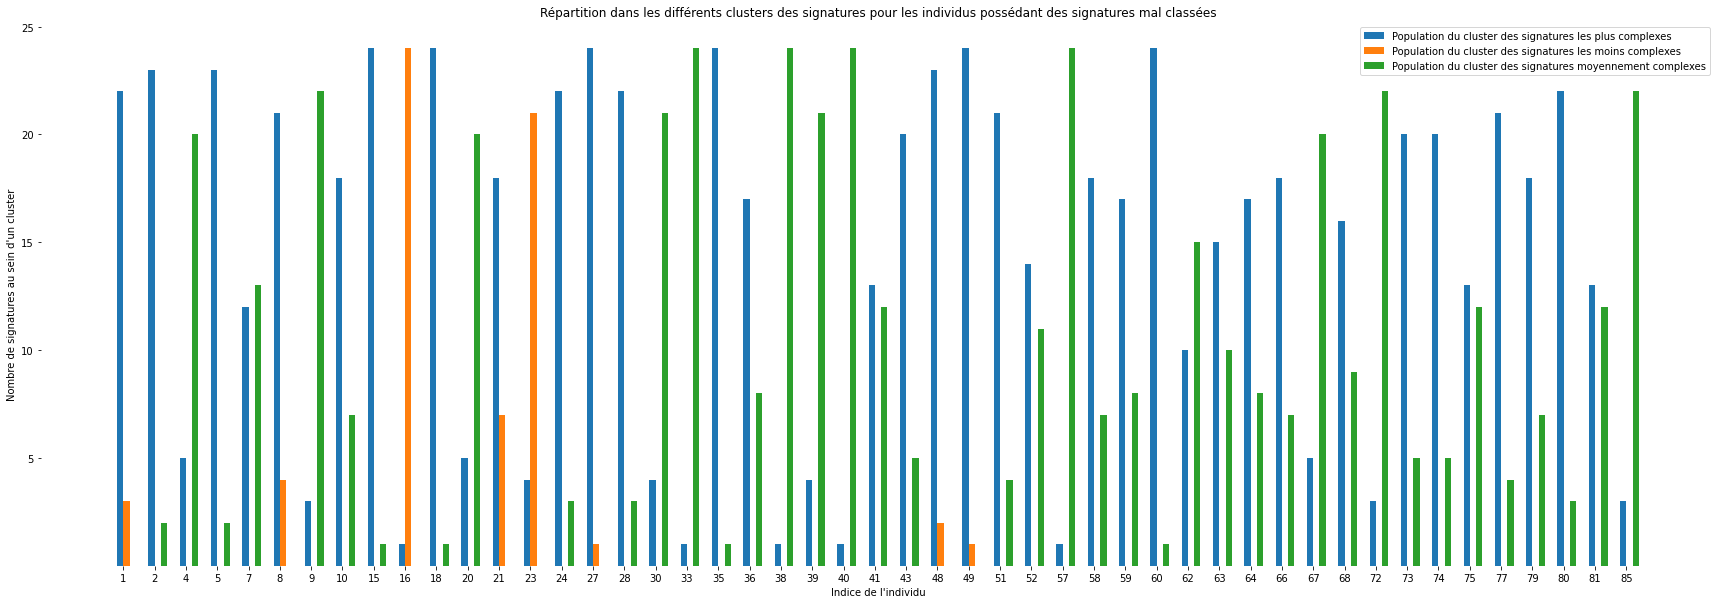

In [ ]:
compte=[0,0,0]

print([i for i in range(0,25)])

liste_individu=[[0,0,0]for i in range(100)]
print(len(liste_individu))

for k in range(100):
  for i in range(k*25,(k+1)*25):
    if kmedoids.labels_[i] ==0:
      liste_individu[k][0]+=1
    elif kmedoids.labels_[i] == 1:
      liste_individu[k][1]+=1
    else:
      liste_individu[k][2]+=1
  
print(liste_individu)

liste_individu_mal_classe=[]
for i in range (len(liste_individu)):
  for j in range(len(liste_individu[0])):
    if liste_individu[i][j] != 0 and liste_individu[i][j] !=25:
      liste_individu_mal_classe.append([i+1,liste_individu[i]])
      break
print(liste_individu_mal_classe)

print([liste_individu_mal_classe[i][1] for i in range(49)])
print(["Inidvidu " + str(liste_individu_mal_classe[i][0]) for i in range(49)])
print(len(liste_individu_mal_classe))

data=[liste_individu_mal_classe[i][1] for i in range(49)]

dim = len(data[0]) 
w = 0.6
dimw = w / dim 
  
fig, ax = plt.subplots() 

fig.set_figheight(10)
fig.set_figwidth(30)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

x = np.arange(len(data)) 
for i in range(len(data[0])): 
    y = [d[i] for d in data] 
    if i ==0:
      b = ax.bar(x + i * dimw, y,  dimw,  label='Population du cluster des signatures les plus complexes', bottom = 0.001) 
    elif i==1:
      b = ax.bar(x + i * dimw, y,  dimw,  label='Population du cluster des signatures les moins complexes', bottom = 0.001)
    else:
      b = ax.bar(x + i * dimw, y,  dimw,  label='Population du cluster des signatures moyennement complexes', bottom = 0.001)
  
ax.set_xticks(x + dimw / 2) 
ax.set_xticklabels([ str(liste_individu_mal_classe[i][0]) for i in range(49)] )
ax.set_ylabel("Nombre de signatures au sein d'un cluster")
ax.set_xlabel("Indice de l'individu")

  
ax.set_title('Répartition dans les différents clusters des signatures pour les individus possédant des signatures mal classées') 

plt.legend()
plt.show() 


## Partie 3

### Représentation de la complexité des 2500 signatures

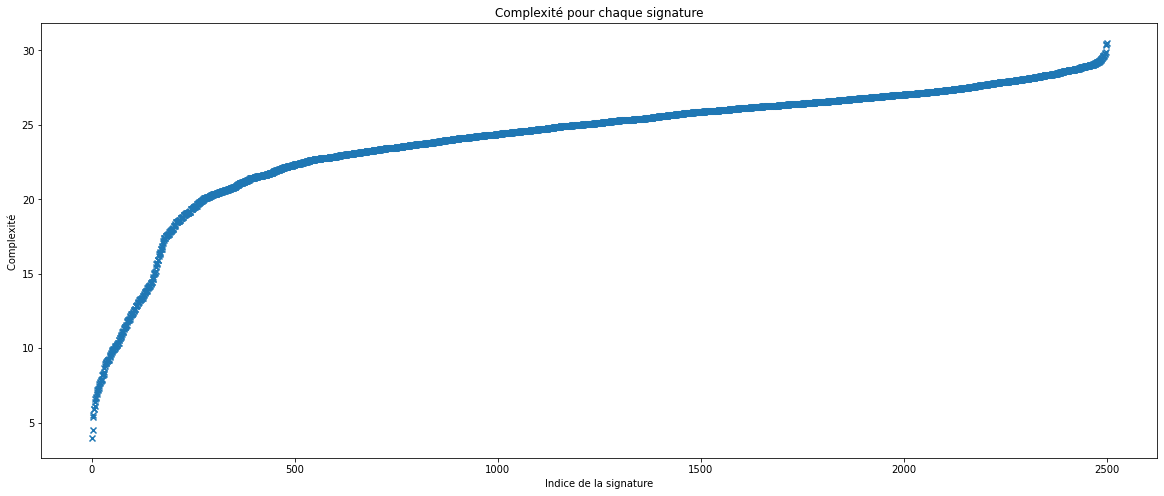

[3.9597879226573, 4.47953057606114, 5.36629209505556, 5.50601710032423, 5.8854704794349, 5.93454502333203, 6.11345668098907, 6.39505297686247, 6.57526541641254, 6.64771824543554, 6.74414571626794, 6.94942067631878, 7.02650207994111, 7.1847410929273, 7.18749219292277, 7.2725933988102, 7.34237626565055, 7.44931857508954, 7.57880642070622, 7.6776479241968, 7.73422611100383, 7.75762652253059, 7.82650591318922, 7.88050584001085, 7.95849585935442, 8.16764040563515, 8.21243940462324, 8.26612046370702, 8.2757691751989, 8.36320951887154, 8.64123516682528, 8.77856490616898, 8.92330164424119, 9.02467290960798, 9.03223061346327, 9.09742880010788, 9.10339634291693, 9.14119212031783, 9.18991551542876, 9.19206626448072, 9.21838019143901, 9.23293953250575, 9.25389153315561, 9.41165770018356, 9.45377469483546, 9.5253330210235, 9.63003248325068, 9.69770169326554, 9.75287625050273, 9.83107792840733, 9.86585883715221, 9.90247287542641, 9.91754520101902, 9.9176539805551, 9.95579762016983, 9.99639905222355,

In [ ]:
plt.figure(figsize=(20,8))
plt.scatter([i for i in range(1,2501)],liste, marker='x', label="24 Gaussiennes")
plt.xlabel("Indice de la signature")
plt.ylabel("Complexité ")
plt.title("Complexité pour chaque signature")
plt.show()

liste.sort()
print(liste)

[19.4183791733071, 21.1680409746232, 17.9781141386921, 20.3498100329553, 18.9587497290952, 17.8805970286835, 20.276367347782, 23.2072891377551, 19.794415507648, 19.3198059132879, 19.0407418203246, 19.1072566262008, 19.3729599852317, 20.7617709167892, 20.4431873162614, 18.5740538645699, 17.278134531521, 19.5412063956489, 17.4147971089666, 20.118962744818, 17.52206238383, 20.5352255362678, 17.9159629374058, 19.7540138374252, 17.6896805730338, 23.8915323112409, 21.4100940463013, 22.2171687371491, 19.4884789619339, 21.5917561662867, 25.0322449046523, 23.5988775652904, 24.5553374261018, 22.0850593660793, 25.0364971903778, 22.7621881831891, 22.8077870611582, 24.6566595508761, 23.0067436553903, 21.2154806958798, 22.9052540278897, 23.247706235594, 22.1646619928532, 21.5230573206646, 21.1236664215915, 21.4416184142763, 23.1950704747524, 20.8447141302536, 23.1262960011889, 21.3784929143305, 26.7815317826965, 27.1259419433164, 26.7839029164343, 26.2525233843375, 26.5719127916834, 27.5787326974565

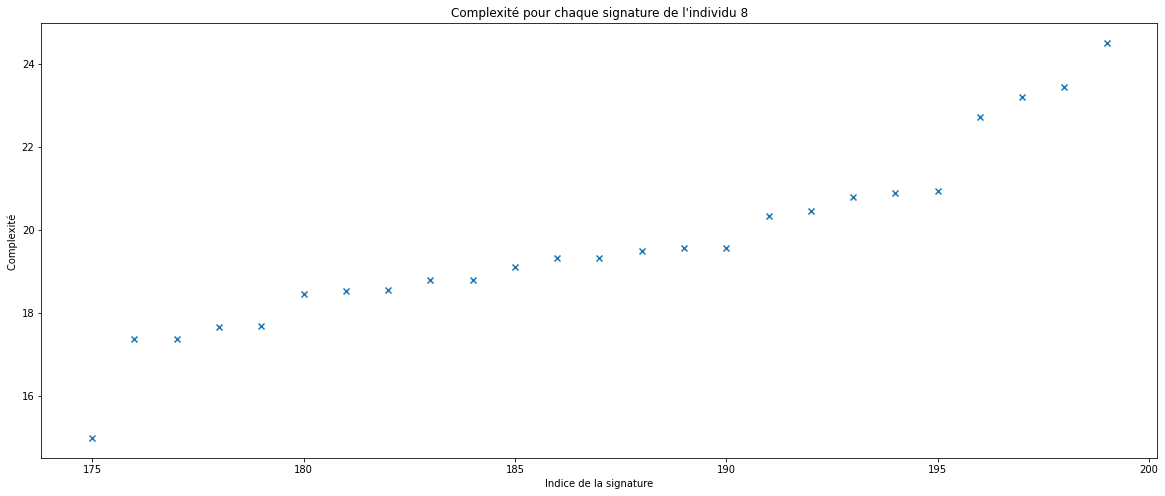

In [ ]:
df=pd.read_csv("/content/Complexité avec " + str(24) + "G (100x25).txt", sep="\t",decimal=",",names=[i+1 for i in range(25)])

nmp=df.to_numpy()

liste=[]
for i in range(len(nmp)):
  for j in range(len(nmp[0])):
    liste.append(float(nmp[i][j]))
print(liste)

def complexite_individu(k):
  plt.figure(figsize=(20,8))
  liste_i=liste[k*25:(k+1)*25]
  liste_i.sort()
  plt.scatter([i for i in range(k*25,(k+1)*25)],liste_i, marker='x', label="24 Gaussiennes")
  plt.xlabel("Indice de la signature")
  plt.ylabel("Complexité ")
  plt.title("Complexité pour chaque signature de l'individu " + str(k+1))
  plt.show()

complexite_individu(7)

### Division en 2 catégories

In [ ]:
# Division aléatoire ?
# Division avec trois échantillons extrême pour créer les clusters ?
# Division en 3 types de valeurs mais pondéré

df=pd.read_csv("/content/Complexité avec " + str(24) + "G (100x25).txt", sep="\t",decimal=",",names=[i+1 for i in range(25)])

nmp=df.to_numpy()

liste=[]
for i in range(len(nmp)):
  for j in range(len(nmp[0])):
    liste.append(float(nmp[i][j]))

##

def representants_random(liste):
  liste_representant_random=random.sample(liste,1250)
  return liste_representant_random 

def representants_moitie(liste):
  liste_representant_random=liste[:1250]
  return liste_representant_random 

def barycentre2(X):
  somme=0
  for i in range (np.size(X)):
    somme+=X[i]
  return somme/np.size(X)

def moyenne(liste):
  somme=0
  for i in range(len(liste)):
    somme+=liste[i]
  return somme/len(liste)

def normalisation(X,barycentre): # a mettre depuis le debut + parler d'extraire les siignatures aux frontières
  normalisation=[]
  for i in X:
    normalisation.append((i-barycentre)/np.std(X))
  return normalisation

print(moyenne(liste))

def representants_par_individu(liste):
  representants=[]
  for k in range(25):
    liste_i=liste[k*25,(k+1)*25]
    for i in range(k*25,(k+1)*25):
      

def representants_cluster(liste):
  liste.sort()
  liste_representant_cluster=liste[200:400] + liste[1600:2100]
  ecart_moyenne=[]
  indice_ecart_moyenne=[]
  ecart={}
  liste.sort()
  for i in range(len(liste)):
    ecart["ecart " + str(i)]=[(liste[i]-moyenne(liste))**2,i]
  sortedecart=sorted(ecart.items(), key=lambda x: x[1])
  print(sortedecart[:550])
  liste_indice_ecart=[]
  for i in sortedecart[:550]:
    liste_indice_ecart.append(i[1][1])
  for i in liste_indice_ecart:
    liste_representant_cluster.append(liste[i])
  random.shuffle(liste_representant_cluster)
  return liste_representant_cluster

print(len(representants_cluster(liste)))


#print(liste[-10:])

24.07318836905758
[('ecart 902', [2.1154030406150502e-06, 902]), ('ecart 901', [3.6990474938367914e-05, 901]), ('ecart 900', [4.3593638966651834e-05, 900]), ('ecart 899', [0.00010170835795725694, 899]), ('ecart 903', [0.00011306944343406296, 903]), ('ecart 904', [0.0001235208971641854, 904]), ('ecart 905', [0.000136436619785705, 905]), ('ecart 898', [0.00014736127656178355, 898]), ('ecart 897', [0.0002574980271476134, 897]), ('ecart 906', [0.00031820235926935424, 906]), ('ecart 907', [0.00042411775788721924, 907]), ('ecart 896', [0.0004402322969251776, 896]), ('ecart 895', [0.00045113901503363295, 895]), ('ecart 894', [0.0005039507479477694, 894]), ('ecart 908', [0.0005985980147059351, 908]), ('ecart 909', [0.0008064579646197037, 909]), ('ecart 910', [0.0011722561199313728, 910]), ('ecart 911', [0.001408330427748601, 911]), ('ecart 912', [0.001684378421756296, 912]), ('ecart 893', [0.001847240458210481, 893]), ('ecart 913', [0.0019127955243056116, 913]), ('ecart 914', [0.00195913898836

### Illustration de l'écart à la moyenne de chaque signature

[25.8714872574954, 25.1329699402652, 25.0383405173486, 25.6074259791795, 25.3622969256584, 25.1229121148888, 26.1241201056336, 25.3164444946494, 25.766853514327, 26.0184470685131, 26.8079596624733, 24.7081481622849, 25.467641609281, 25.324368668275, 25.9159497661781, 25.2188757325018, 25.6401674019512, 26.4309621435699, 24.5553462007079, 26.4445560421506, 25.5473643074291, 25.8655210449736, 25.9104868530154, 24.5002940692602, 25.5765997081707]
25.571021571607265
[25.8714872574954, 25.1329699402652, 25.0383405173486, 25.6074259791795, 25.3622969256584, 25.1229121148888, 26.1241201056336, 25.3164444946494, 25.766853514327, 26.0184470685131, 26.8079596624733, 24.7081481622849, 25.467641609281, 25.324368668275, 25.9159497661781, 25.2188757325018, 25.6401674019512, 26.4309621435699, 24.5553462007079, 26.4445560421506, 25.5473643074291, 25.8655210449736, 25.9104868530154, 24.5002940692602, 25.5765997081707]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


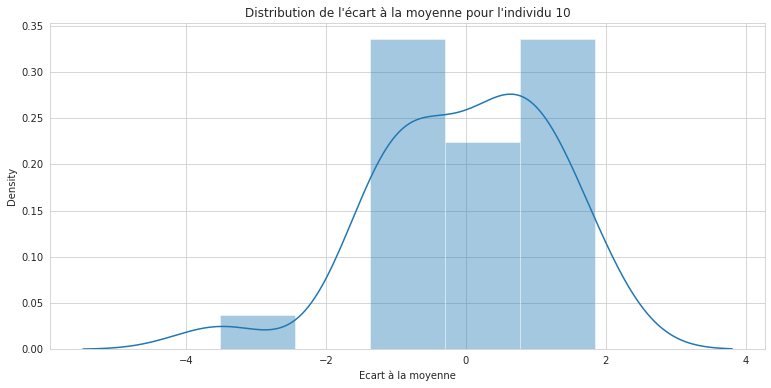

In [ ]:
import seaborn as sns

df=pd.read_csv("/content/Complexité avec " + str(24) + "G (100x25).txt", sep="\t",decimal=",",names=[i+1 for i in range(25)])

nmp=df.to_numpy()

liste=[]
for i in range(len(nmp)):
  for j in range(len(nmp[0])):
    liste.append(float(nmp[i][j]))

k=25
print(liste[8*25:9*25])
print(moyenne(liste[8*25:9*25]))

def ecart_moyenne(liste):
  ecart={}
  for i in range(len(liste)):
    ecart["ecart " + str(i)]=[(liste[i]-moyenne(liste)),i]
  sortedecart=sorted(ecart.items(), key=lambda x: x[1])
  return sortedecart

print(liste[8*25:9*25])

def dataframe(liste):
  df = pd.DataFrame(columns=['Indice de la signature', "Indice de l'individu", "Moyenne de la complexité","Ecart à la moyenne"])
  for k in range(1,101):
    individu=k*25
    for i in range(25):
      if k==1:
        df = df.append({'Indice de la signature': int(i), "Indice de l'individu": int(k), 'Moyenne de la complexité': moyenne(liste[:+int(individu)]),"Ecart à la moyenne":ecart_moyenne(liste[:+int(individu)])[i][1][0]},ignore_index=True)
      elif k==100:
        df = df.append({'Indice de la signature': int(i), "Indice de l'individu": int(k), 'Moyenne de la complexité': moyenne(liste[:-25]),"Ecart à la moyenne":ecart_moyenne(liste[:-25])[i][1][0]},ignore_index=True)
      else:
        df = df.append({'Indice de la signature': int(i), "Indice de l'individu": int(k), 'Moyenne de la complexité': moyenne(liste[int(individu)-25:int(individu)]),"Ecart à la moyenne":ecart_moyenne(liste[int(individu)-25:int(individu)])[i][1][0]},ignore_index=True)
  return df

df=dataframe(liste)
df.head()
df2 = df["Ecart à la moyenne"].iloc[9*25:10*25]

sns.set_style("whitegrid")
plt.figure(figsize=(12.8,6))
sns.distplot(df2).set_title("Distribution de l'écart à la moyenne pour l'individu " + str(10));

### Application du K-Medoids et du KNN

In [ ]:
## Normalisation

barycentre1=barycentre2(liste)

liste_normalisee=normalisation(liste,barycentre1)
liste_normalisee=np.array(liste_normalisee)
liste_normalisee=liste_normalisee.reshape(-1,1)
liste_normalisee=list(liste_normalisee)

X1=representants_cluster(liste_normalisee)
random.shuffle(X1)
X2=liste_normalisee
for i in X1:
  X2.remove(i)

print(len(liste_normalisee))

## Implémentation K-Medoids


kmedoids24 = KMedoids(n_clusters=3).fit(X1)
kmedoids24.labels_

## Implémentation KNN

from sklearn.neighbors import NearestNeighbors

centers=kmedoids24.cluster_centers_
print(centers)
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(centers)

## Remplissage clusters

cluster0=[]
cluster1=[]
cluster2=[]

ordonne=[0,0,0]
'''
indices_cluster0=[]
indices_cluster1=[]
indices_cluster2=[]
for i in range(len(kmedoids24.labels_)):
  if kmedoids24.labels_[i] == 0:
      ordonne[0]+=1
      cluster0.append(liste_normalisee[i][0])
      indices_cluster0.append(i)
  elif kmedoids24.labels_[i] == 1:
      ordonne[1]+=1
      cluster1.append(liste_normalisee[i][0])
      indices_cluster1.append(i)
  else:
      ordonne[2]+=1
      cluster2.append(liste_normalisee[i][0])
      indices_cluster2.append(i)
 '''
labels=[]
for i in X2:
  labels.append(neigh.kneighbors([i])[1][0][0])
  if neigh.kneighbors([i])[1][0][0] == 0:
    cluster0.append(i[0])
    ordonne[0]+=1
  elif neigh.kneighbors([i])[1][0][0] == 1:
    cluster1.append(i[0])
    ordonne[1]+=1
  else:
    cluster2.append(i[0])
    ordonne[2]+=1

print(cluster0)
print(cluster1)
print(cluster2)
print(ordonne)

[('ecart 902', [array([1.16217313e-07]), 902]), ('ecart 901', [array([2.03220545e-06]), 901]), ('ecart 900', [array([2.39497414e-06]), 900]), ('ecart 899', [array([5.5877163e-06]), 899]), ('ecart 903', [array([6.2118786e-06]), 903]), ('ecart 904', [array([6.78606699e-06]), 904]), ('ecart 905', [array([7.4956389e-06]), 905]), ('ecart 898', [array([8.09582441e-06]), 898]), ('ecart 897', [array([1.41465849e-05]), 897]), ('ecart 906', [array([1.74815969e-05]), 906]), ('ecart 907', [array([2.33004421e-05]), 907]), ('ecart 896', [array([2.41857526e-05]), 896]), ('ecart 895', [array([2.47849526e-05]), 895]), ('ecart 894', [array([2.7686356e-05]), 894]), ('ecart 908', [array([3.28861458e-05]), 908]), ('ecart 909', [array([4.43056835e-05]), 909]), ('ecart 910', [array([6.44021274e-05]), 910]), ('ecart 911', [array([7.73717229e-05]), 911]), ('ecart 912', [array([9.25374173e-05]), 912]), ('ecart 893', [array([0.00010148]), 893]), ('ecart 913', [array([0.00010509]), 913]), ('ecart 914', [array([0.

Inertie intra-classe pour le cluster 0 : 28.41
Inertie intra-classe pour le cluster 1 : 851.23
Inertie intra-classe pour le cluster 2 : 157.07
Inertie inter-classe : 1.11
Indice de silhouette : 0.4088950932114269
1250


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


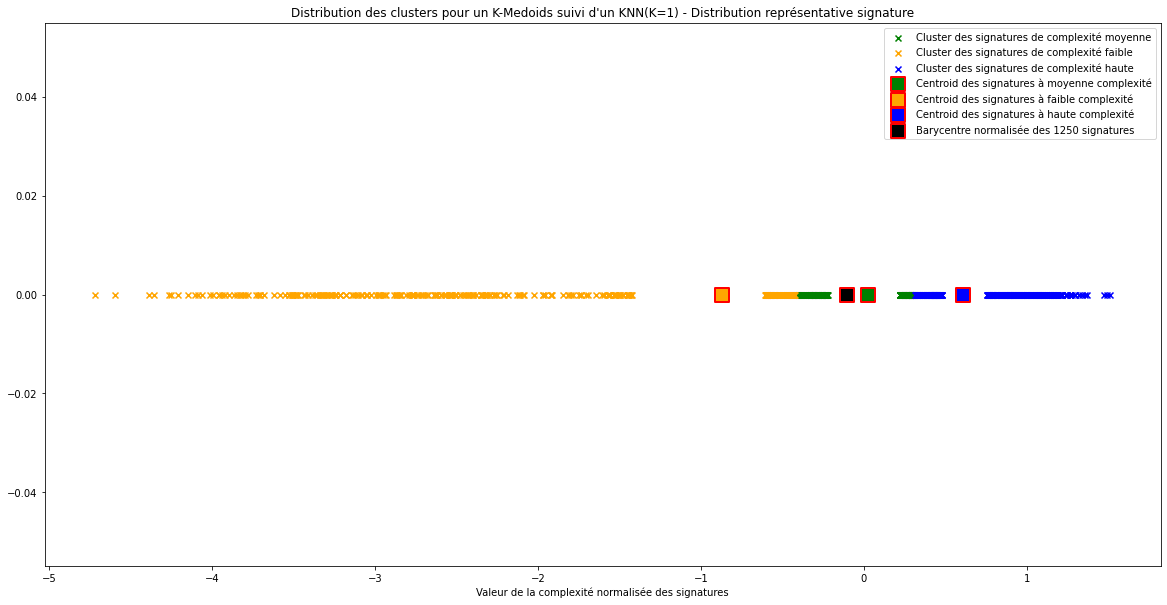

In [ ]:
def wss_cluster(cluster,representant):
  somme_distance=0
  for j in cluster:
    somme_distance+=distance2(j,representant)
  return somme_distance

def bss(representants,barycentre,k):
  somme=0
  for i in range(k):
    somme+=(representants[i][0]-barycentre)**2
  return somme[0]

barycentre0=barycentre2(X2)
labels=np.array(labels)
labels=labels.reshape(-1,1)

print('Inertie intra-classe pour le cluster 0 : {}'.format(np.round(wss_cluster(cluster0,centers[0][0]),2)))
print('Inertie intra-classe pour le cluster 1 : {}'.format(np.round(wss_cluster(cluster1,centers[1][0]),2)))
print('Inertie intra-classe pour le cluster 2 : {}'.format(np.round(wss_cluster(cluster0,centers[2][0]),2)))
print("Inertie inter-classe : " + str(np.round(bss(centers,barycentre0,3),2)))
print('Indice de silhouette : {}'.format(metrics.silhouette_score(X2,labels)))
print(len(cluster0) + len(cluster1) + len(cluster2) )
figure1 = plt.figure(figsize = (20, 10))

plt.xlabel('Valeur de la complexité normalisée des signatures')
plt.title("Distribution des clusters pour un K-Medoids suivi d'un KNN(K=1) - Distribution représentative signature")
plt.scatter(cluster0,[0 for i in range(len(cluster0))],color='green',marker='x',label = "Cluster des signatures de complexité moyenne")
plt.scatter(cluster1,[0 for i in range(len(cluster1))],color='orange',marker='x',label = "Cluster des signatures de complexité faible")
plt.scatter(cluster2,[0 for i in range(len(cluster2))],color='blue',marker='x',label = "Cluster des signatures de complexité haute")
plt.scatter(centers[0][0],[0],color='green',linewidths=2,marker='s',s=200,label="Centroid des signatures à moyenne complexité",edgecolor ="red")
plt.scatter(centers[1][0],[0],color='orange',linewidths=2,marker='s',s=200,label="Centroid des signatures à faible complexité",edgecolor ="red")
plt.scatter(centers[2][0],[0],color='blue',linewidths=2,marker='s',s=200,label="Centroid des signatures à haute complexité",edgecolor ="red")
plt.scatter([barycentre0],[0],color='black',linewidths=2,marker='s',s=200,label="Barycentre normalisée des 1250 signatures",edgecolor ="red")
plt.legend()
plt.show()

### Représentation des individus mal classés

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
100
-3.9955707165497847
[[0, 25, 0], [0, 25, 0], [0, 25, 0], [0, 25, 0], [0, 25, 0], [0, 25, 0], [0, 25, 0], [0, 25, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 25, 0], [0, 25, 0], [0, 25, 0], [7, 18, 0], [25, 0, 0], [25, 0, 0], [25, 0, 0], [25, 0, 0], [25, 0, 0], [25, 0, 0], [9, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [16, 0, 0], [25, 0, 0], [25, 0, 0], [25, 0, 0], [25, 0, 0], [25, 0, 0], [12, 0, 13], [0, 0, 25], [0, 0, 25], [0, 0, 25], [0, 0, 25], [0, 0, 25], [0, 0, 25], [0, 0, 25], [0, 0, 25], [0, 0, 25], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0

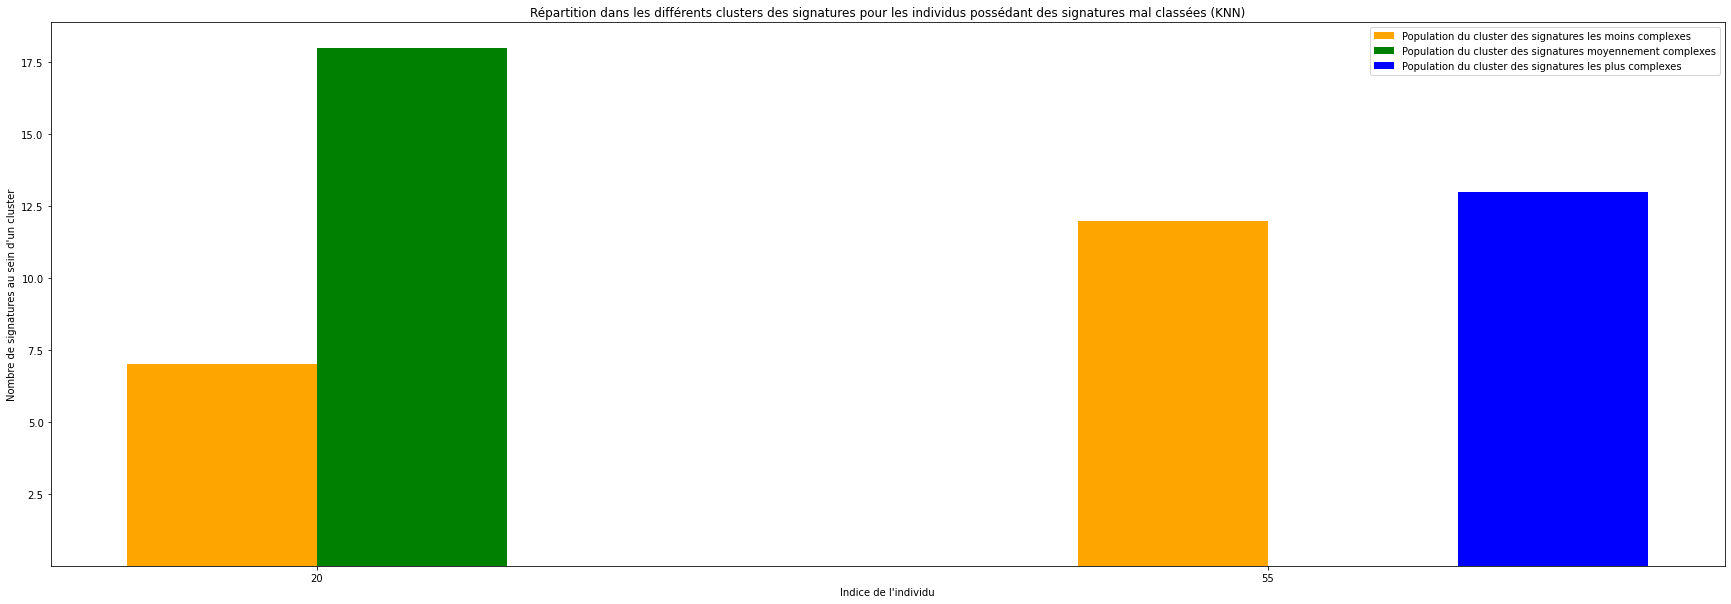

In [ ]:
compte=[0,0,0]

liste_normalisee=normalisation(liste,barycentre1)
liste_normalisee=np.array(liste_normalisee)
liste_normalisee=liste_normalisee.reshape(-1,1)
liste_normalisee=list(liste_normalisee)

print([i for i in range(0,25)])

liste_individu=[[0,0,0]for i in range(100)]
print(len(liste_individu))
print(liste_normalisee[12][0])

for i in range(len(X2)):
  if neigh.kneighbors([X2[i]])[1][0][0] == 0:
    for k in range(len(liste_normalisee)):
      if liste_normalisee[k][0] == X2[i][0]:
        liste_individu[k//25][0]+=1
  elif neigh.kneighbors([X2[i]])[1][0][0] == 1:
    for k in range(len(liste_normalisee)):
      if liste_normalisee[k][0] == X2[i][0]:
        liste_individu[k//25][1]+=1
  else:
    for k in range(len(liste_normalisee)):
      if liste_normalisee[k][0] == X2[i][0]:
        liste_individu[k//25][2]+=1
  
print(liste_individu)

liste_individu_mal_classe=[]
for i in range(len(liste_individu)):
    if ((liste_individu[i][0] != 0) and (liste_individu[i][2] != 0)) or ((liste_individu[i][0] != 0) and (liste_individu[i][1] != 0)) or ((liste_individu[i][1] != 0) and (liste_individu[i][2] != 0)):
      liste_individu_mal_classe.append([i+1,liste_individu[i]])
print(liste_individu_mal_classe)

print([liste_individu_mal_classe[i][1] for i in range(len(liste_individu_mal_classe))])
print(["Inidvidu " + str(liste_individu_mal_classe[i][0]) for i in range(len(liste_individu_mal_classe))])
print(len(liste_individu_mal_classe))

data=[liste_individu_mal_classe[i][1] for i in range(len(liste_individu_mal_classe))]

dim = len(data[0]) 
w = 0.6
dimw = w / dim 
  
fig, ax = plt.subplots() 

fig.set_figheight(10)
fig.set_figwidth(30)



x = np.arange(len(data)) 
for i in range(len(data[0])): 
    y = [d[i] for d in data] 
    if i ==0:
      b = ax.bar(x + i * dimw, y,  dimw,  label='Population du cluster des signatures les moins complexes', bottom = 0.001,color='orange') 
    elif i==1:
      b = ax.bar(x + i * dimw, y,  dimw,  label='Population du cluster des signatures moyennement complexes', bottom = 0.001,color='green')
    else:
      b = ax.bar(x + i * dimw, y,  dimw,  label='Population du cluster des signatures les plus complexes', bottom = 0.001,color='blue')
  
ax.set_xticks(x + dimw / 2) 
ax.set_xticklabels([ str(liste_individu_mal_classe[i][0]) for i in range(len(liste_individu_mal_classe))] )
ax.set_ylabel("Nombre de signatures au sein d'un cluster")
ax.set_xlabel("Indice de l'individu")

  
ax.set_title('Répartition dans les différents clusters des signatures pour les individus possédant des signatures mal classées (KNN)') 

plt.legend()
plt.show() 

In [ ]:
print(23//25)
print(23*25)

0
575
